In [33]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import hvplot.pandas

# Impor the OpenWeatherMap API key
from api_keys import geoapify_key

# Import pprint for JSON reads
from pprint import pprint

In [18]:
file = "raw/rebased_2021_erp.xlsx"

In [17]:
pop_df = pd.read_excel(file, decimal=',')
pop_df

,LGA code,Local Government Area,2001,2002,2003,2004,2005,2006,2007,2008,...,2016,2017,2018,2019,2020,2021,Unnamed: 23,Local Government Area.1,Change in pop - 16-21,% change
0,20110,Alpine,12709.0,12655.0,12581.0,12432.0,12372.0,12260.0,12227.0,12156.0,...,12578.0,12679.0,12807.0,12884.0,13028.0,13156.0,NaN,Alpine,578.0,0.045953
1,20260,Ararat,11544.0,11566.0,11536.0,11510.0,11452.0,11422.0,11363.0,11344.0,...,11745.0,11790.0,11792.0,11822.0,11896.0,11821.0,NaN,Ararat,76.0,0.006471
2,20570,Ballarat,82333.0,83168.0,84190.0,84775.0,85663.0,86647.0,87796.0,89531.0,...,103500.0,105498.0,107518.0,109650.0,111476.0,113482.0,NaN,Ballarat,9982.0,0.096444
3,20660,Banyule,117967.0,117559.0,117313.0,116661.0,117149.0,117963.0,119362.0,120580.0,...,127447.0,128601.0,129548.0,130478.0,130121.0,127376.0,NaN,Banyule,-71.0,-0.000557
4,20740,Bass Coast,25243.0,25809.0,26224.0,26476.0,26894.0,26941.0,27408.0,27981.0,...,33464.0,34726.0,36041.0,37382.0,38869.0,40641.0,NaN,Bass Coast,7177.0,0.214469
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
82,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
83,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
84,"Source: Regional population, 2021",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
85,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [19]:
#Delete unwanted column
del pop_df["Unnamed: 23"]
pop_df

,LGA code,Local Government Area,2001,2002,2003,2004,2005,2006,2007,2008,...,2015,2016,2017,2018,2019,2020,2021,Local Government Area.1,Change in pop - 16-21,% change
0,20110,Alpine,12709.0,12655.0,12581.0,12432.0,12372.0,12260.0,12227.0,12156.0,...,12429.0,12578.0,12679.0,12807.0,12884.0,13028.0,13156.0,Alpine,578.0,0.045953
1,20260,Ararat,11544.0,11566.0,11536.0,11510.0,11452.0,11422.0,11363.0,11344.0,...,11644.0,11745.0,11790.0,11792.0,11822.0,11896.0,11821.0,Ararat,76.0,0.006471
2,20570,Ballarat,82333.0,83168.0,84190.0,84775.0,85663.0,86647.0,87796.0,89531.0,...,101479.0,103500.0,105498.0,107518.0,109650.0,111476.0,113482.0,Ballarat,9982.0,0.096444
3,20660,Banyule,117967.0,117559.0,117313.0,116661.0,117149.0,117963.0,119362.0,120580.0,...,126088.0,127447.0,128601.0,129548.0,130478.0,130121.0,127376.0,Banyule,-71.0,-0.000557
4,20740,Bass Coast,25243.0,25809.0,26224.0,26476.0,26894.0,26941.0,27408.0,27981.0,...,32576.0,33464.0,34726.0,36041.0,37382.0,38869.0,40641.0,Bass Coast,7177.0,0.214469
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
82,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
83,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
84,"Source: Regional population, 2021",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
85,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [20]:
#Delete unwanted rows 
pop_df = pop_df.dropna(how='any')
pop_df

,LGA code,Local Government Area,2001,2002,2003,2004,2005,2006,2007,2008,...,2015,2016,2017,2018,2019,2020,2021,Local Government Area.1,Change in pop - 16-21,% change
0,20110,Alpine,12709.0,12655.0,12581.0,12432.0,12372.0,12260.0,12227.0,12156.0,...,12429.0,12578.0,12679.0,12807.0,12884.0,13028.0,13156.0,Alpine,578.0,0.045953
1,20260,Ararat,11544.0,11566.0,11536.0,11510.0,11452.0,11422.0,11363.0,11344.0,...,11644.0,11745.0,11790.0,11792.0,11822.0,11896.0,11821.0,Ararat,76.0,0.006471
2,20570,Ballarat,82333.0,83168.0,84190.0,84775.0,85663.0,86647.0,87796.0,89531.0,...,101479.0,103500.0,105498.0,107518.0,109650.0,111476.0,113482.0,Ballarat,9982.0,0.096444
3,20660,Banyule,117967.0,117559.0,117313.0,116661.0,117149.0,117963.0,119362.0,120580.0,...,126088.0,127447.0,128601.0,129548.0,130478.0,130121.0,127376.0,Banyule,-71.0,-0.000557
4,20740,Bass Coast,25243.0,25809.0,26224.0,26476.0,26894.0,26941.0,27408.0,27981.0,...,32576.0,33464.0,34726.0,36041.0,37382.0,38869.0,40641.0,Bass Coast,7177.0,0.214469
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
75,27260,Wyndham,86604.0,90333.0,95776.0,101789.0,108795.0,115161.0,123778.0,133063.0,...,213815.0,227008.0,241436.0,256758.0,272852.0,286796.0,296193.0,Wyndham,69185.0,0.304769
76,27350,Yarra,68522.0,69415.0,70115.0,70811.0,71719.0,72808.0,74289.0,75868.0,...,89923.0,92894.0,94465.0,95440.0,96459.0,96547.0,91543.0,Yarra,-1351.0,-0.014543
77,27450,Yarra Ranges,141674.0,142449.0,142928.0,142827.0,142928.0,143393.0,144485.0,145884.0,...,153391.0,155226.0,156621.0,157696.0,158585.0,158657.0,157419.0,Yarra Ranges,2193.0,0.014128
78,27630,Yarriambiack,8184.0,8095.0,7982.0,7847.0,7715.0,7609.0,7505.0,7438.0,...,6826.0,6743.0,6705.0,6693.0,6669.0,6633.0,6511.0,Yarriambiack,-232.0,-0.034406


In [34]:
#Convert all columns types to string
pop_df.columns = pop_df.columns.astype(str)
pop_df.columns

Index(['LGA code', 'Local Government Area', '2001', '2002', '2003', '2004',
       '2005', '2006', '2007', '2008', '2009', '2010', '2011', '2012', '2013',
       '2014', '2015', '2016', '2017', '2018', '2019', '2020', '2021',
       'Local Government Area.1', 'Change in pop - 16-21', '% change'],
      dtype='object')

In [35]:
pop_new_df = pop_df.loc[:,['Local Government Area','2016','2021',"Change in pop - 16-21"]]
pop_new_df.head()

,Local Government Area,2016,2021,Change in pop - 16-21
0,Alpine,12578.0,13156.0,578.0
1,Ararat,11745.0,11821.0,76.0
2,Ballarat,103500.0,113482.0,9982.0
3,Banyule,127447.0,127376.0,-71.0
4,Bass Coast,33464.0,40641.0,7177.0


In [36]:
#Check Data Type
pop_new_df.dtypes

Local Government Area     object
2016                     float64
2021                     float64
Change in pop - 16-21    float64
dtype: object

## TOP 14th growth cities

In [37]:
#Find top Population growth

pop_top5_df = pop_new_df.sort_values(by=["Change in pop - 16-21"], ascending=False)
pop_top5_df

,Local Government Area,2016,2021,Change in pop - 16-21
75,Wyndham,227008.0,296193.0,69185.0
13,Casey,312789.0,369453.0,56664.0
32,Hume,207041.0,246850.0,39809.0
44,Melton,141420.0,181223.0,39803.0
26,Greater Geelong,239529.0,270776.0,31247.0
...,...,...,...,...
63,Stonnington,111003.0,106278.0,-4725.0
17,Darebin,155126.0,150335.0,-4791.0
58,Port Phillip,108627.0,103508.0,-5119.0
8,Boroondara,177276.0,169901.0,-7375.0


In [38]:
#Find top population growth by Percentages
pop_top5_df["Percentage(%) of Growth"] = round((pop_top5_df["Change in pop - 16-21"]/pop_top5_df["2016"])*100,2)
pop_top5_df.head()

,Local Government Area,2016,2021,Change in pop - 16-21,Percentage(%) of Growth
75,Wyndham,227008.0,296193.0,69185.0,30.48
13,Casey,312789.0,369453.0,56664.0,18.12
32,Hume,207041.0,246850.0,39809.0,19.23
44,Melton,141420.0,181223.0,39803.0,28.15
26,Greater Geelong,239529.0,270776.0,31247.0,13.05


In [39]:
#Create new dataframe of top 15 LGA
lga_top = pop_top5_df.iloc[0:14, :]
lga_top

,Local Government Area,2016,2021,Change in pop - 16-21,Percentage(%) of Growth
75,Wyndham,227008.0,296193.0,69185.0,30.48
13,Casey,312789.0,369453.0,56664.0,18.12
32,Hume,207041.0,246850.0,39809.0,19.23
44,Melton,141420.0,181223.0,39803.0,28.15
26,Greater Geelong,239529.0,270776.0,31247.0,13.05
73,Whittlesea,207058.0,231799.0,24741.0,11.95
12,Cardinia,97573.0,119521.0,21948.0,22.49
2,Ballarat,103500.0,113482.0,9982.0,9.64
24,Greater Bendigo,112267.0,121221.0,8954.0,7.98
52,Mornington Peninsula,161528.0,170390.0,8862.0,5.49


## Visualise the growth

<AxesSubplot:xlabel='Local Government Area'>

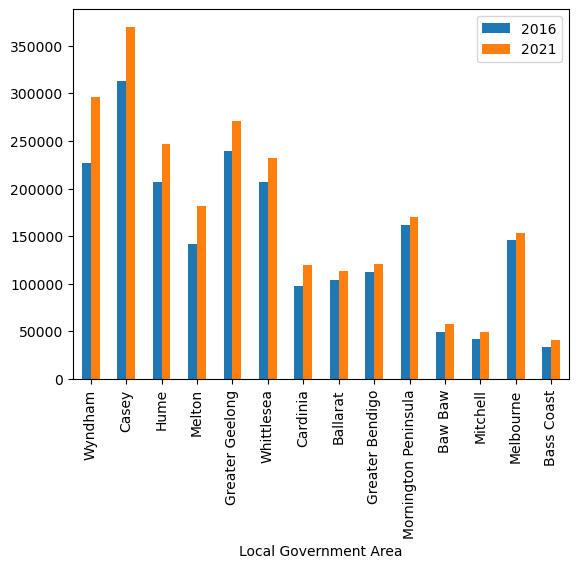

In [42]:
#Create DataFrame for plotting
lga_df = pd.DataFrame(lga_top)

lga_df.plot(x="Local Government Area", y=["2016","2021"], kind="bar", stacked=False)

In [43]:
lga_reduced = lga_df.loc[:, ["Local Government Area","2016","2021"]]

lga_index = lga_reduced.set_index(["Local Government Area"])

lga_transposed = lga_index.T
lga_transposed

Local Government Area,Wyndham,Casey,Hume,Melton,Greater Geelong,Whittlesea,Cardinia,Ballarat,Greater Bendigo,Mornington Peninsula,Baw Baw,Mitchell,Melbourne,Bass Coast
2016,227008.0,312789.0,207041.0,141420.0,239529.0,207058.0,97573.0,103500.0,112267.0,161528.0,49296.0,41795.0,146096.0,33464.0
2021,296193.0,369453.0,246850.0,181223.0,270776.0,231799.0,119521.0,113482.0,121221.0,170390.0,57580.0,49684.0,153674.0,40641.0


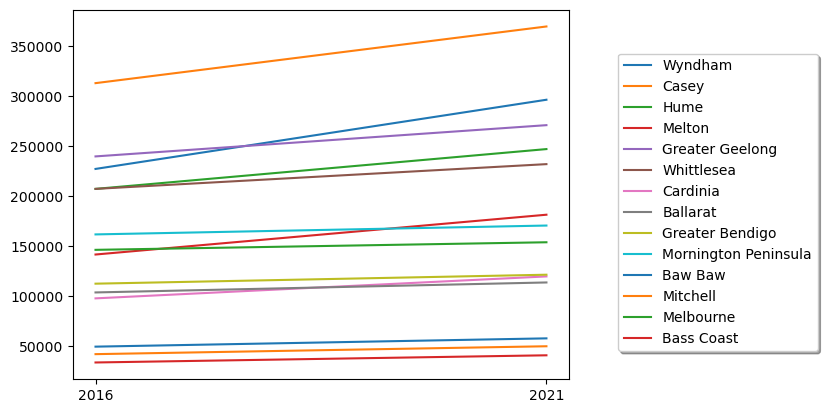

In [44]:
ax = lga_transposed.plot(kind="line")

x_axis = np.arange(2)
tick_locations = [values for values in x_axis]
plt.xticks(tick_locations, ["2016","2021"])

ax.legend(loc='upper center', bbox_to_anchor=(1.3, 0.9),
          ncol=1, fancybox=True, shadow=True)
plt.show()

<AxesSubplot:>

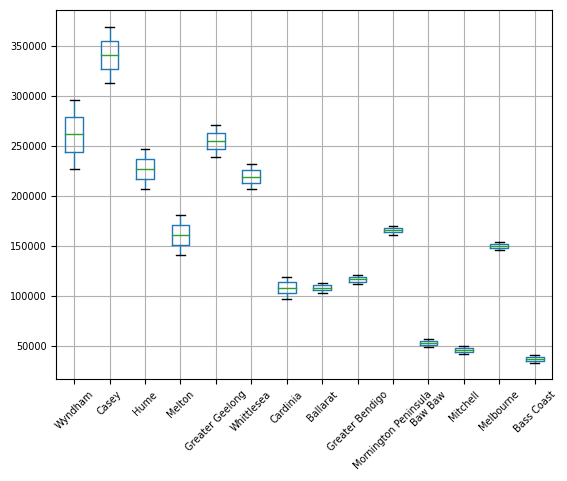

In [45]:
lga_transposed.boxplot(rot=45, fontsize=7)


## Finding Geocoordinates of top growth cities

In [46]:
#Create empty columns for Latitude and Longitudes

lga_df["Longitude"] = ""
lga_df["Latitude"] = ""
lga_df

,Local Government Area,2016,2021,Change in pop - 16-21,Percentage(%) of Growth,Longitude,Latitude
75,Wyndham,227008.0,296193.0,69185.0,30.48,,
13,Casey,312789.0,369453.0,56664.0,18.12,,
32,Hume,207041.0,246850.0,39809.0,19.23,,
44,Melton,141420.0,181223.0,39803.0,28.15,,
26,Greater Geelong,239529.0,270776.0,31247.0,13.05,,
73,Whittlesea,207058.0,231799.0,24741.0,11.95,,
12,Cardinia,97573.0,119521.0,21948.0,22.49,,
2,Ballarat,103500.0,113482.0,9982.0,9.64,,
24,Greater Bendigo,112267.0,121221.0,8954.0,7.98,,
52,Mornington Peninsula,161528.0,170390.0,8862.0,5.49,,


In [48]:
#Define params
#geoapify_key = 
params = {
    "apiKey":geoapify_key,
    "format":"json"}

# Set the base URL
base_url = "https://api.geoapify.com/v1/geocode/search"

In [49]:
# Loop through the cities_pd DataFrame and search coordinates for each city
for index, row in lga_df.iterrows():

    # Get the city's name & add ", Australia" to the string so geoapify finds the correct city
    city = "City of " + row["Local Government Area"] + ", Australia"

    # Add the current city to the parameters
    params["text"] = f"{city}"
    params["state"] = "VIC"

    # Make the API request
    response = requests.get(base_url, params=params)
    
    # Convert reponse to JSON
    response = response.json()
    
    
    # Extract latitude and longitude
    lga_df.loc[index, "Latitude"] = response["results"][0]["lat"]
    lga_df.loc[index, "Longitude"] = response["results"][0]["lon"]
    
#     # Log the search results
#     print(f"Coordinates for {city} fetched...")

# Display sample data to confirm that the coordinates appear
lga_df.head()

,Local Government Area,2016,2021,Change in pop - 16-21,Percentage(%) of Growth,Longitude,Latitude
75,Wyndham,227008.0,296193.0,69185.0,30.48,144.630237,-37.893689
13,Casey,312789.0,369453.0,56664.0,18.12,145.310842,-38.092627
32,Hume,207041.0,246850.0,39809.0,19.23,144.823708,-37.597152
44,Melton,141420.0,181223.0,39803.0,28.15,144.635969,-37.681295
26,Greater Geelong,239529.0,270776.0,31247.0,13.05,144.392813,-38.052098


## Create Map for LGAs

In [50]:
%%capture --no-display

# Configure the map plot
map_plot_population = lga_df.hvplot.points("Longitude","Latitude",
                                geo = True, 
                                tiles="OSM",
                                size = "Change in pop - 16-21",
                                scale=0.14,
                                frame_width = 650,
                                frame_height =450 ,
                                color = "Local Government Area")

# Display the map
map_plot_population

:Overlay
   .Tiles.I  :Tiles   [x,y]
   .Points.I :Points   [Longitude,Latitude]   (Local Government Area,Change in pop - 16-21)

## Identify Health facilities

In [52]:
#Create new columns for hospital search (Nearest Hospital in the municipality)
lga_health_df = lga_df.loc[:,["Local Government Area","Longitude","Latitude"]]
lga_health_df["Hospital name"] = ""
lga_health_df["Hospital Distance"] = ""

In [53]:
# Set the parameters for the type of search
categories = "healthcare.hospital"
limit = 20
    
# set up a parameters dictionary
params = {
    "categories": categories,
    "limit":limit,
    "apiKey":geoapify_key}

# Set base URL
base_url = "https://api.geoapify.com/v2/places"

In [54]:
# Iterate through the DataFrame
for index, row in lga_health_df.iterrows():
    
    # Get the data from the current DataFrame's row
    city = lga_health_df.loc[index, "Local Government Area"]
    latitude = lga_health_df.loc[index,"Latitude"]
    longitude = lga_health_df.loc[index,"Longitude"]
    
    # Add the current type to the parameters
    params["bias"] = f"proximity:{longitude},{latitude}"
   
    # Make an API request using the params dictionary and response to JSON format
    hospital = requests.get(base_url, params=params).json()
#     pprint(hospital)

    # Grab the first hospital from the results and store the details in the DataFrame
    try:
        lga_health_df.loc[index, "Hospital name"] =  hospital["features"][0]["properties"]["name"]
        lga_health_df.loc[index, "Hospital Distance"] = int(hospital["features"][0]["properties"]["distance"])
        lga_health_df.loc[index, "Hospital Latitude"] = hospital["features"][0]["properties"]["lat"]
        lga_health_df.loc[index, "Hospital Longitude"] = hospital["features"][0]["properties"]["lon"]
        
    except (KeyError, IndexError):
        # If no hospital is found, set the hospital name as "No Hospital found".
        lga_health_df.loc[index, "Hospital name"] = "No Hospital found"
        
        # Set the distance column value to np.nan to allow sorting values
        lga_health_df.loc[index, "Hospital Distance"] = np.nan
        lga_health_df.loc[index, "Hospital Latitude"] = np.nan
        lga_health_df.loc[index, "Hospital Longitude"] = np.nan
        
    # Log the search results
#     print(f"nearest hospital in {city}: {lga_df.loc[index, 'hospital name']}")

# Display sample data 
lga_health_df
    

,Local Government Area,Longitude,Latitude,Hospital name,Hospital Distance,Hospital Latitude,Hospital Longitude
75,Wyndham,144.630237,-37.893689,Werribee Mercy Hospital,5802,-37.887128,144.697714
13,Casey,145.310842,-38.092627,Cranbourne Integrated Care Centre,3379,-38.113481,145.281069
32,Hume,144.823708,-37.597152,Craigieburn Health Service,8386,-37.595697,144.919647
44,Melton,144.635969,-37.681295,Melton Health,6809,-37.687464,144.558226
26,Greater Geelong,144.392813,-38.052098,Barwon Health North,4792,-38.085682,144.356768
73,Whittlesea,145.061881,-37.550731,No Hospital found,NaN,NaN,NaN
12,Cardinia,145.41667,-38.15,Koo Wee Rup Hospital,8029,-38.200676,145.484259
2,Ballarat,143.767486,-37.519648,Ballarat Day Procedural Centre,6154,-37.540908,143.832191
24,Greater Bendigo,144.290407,-36.722847,Bendigo Health,2799,-36.749115,144.281051
52,Mornington Peninsula,145.090723,-38.312806,The Bays Hospital,8639,-38.303736,145.189625


In [55]:
#Create new columns for other healthcare search
lga_health_df["Pharmacy name"] = ""
lga_health_df["Pharmacy Distance"] = ""

In [56]:
# Set the parameters for the type of search
categories = "healthcare.pharmacy"
limit = 20

# set up a parameters dictionary
params = {
    "categories": categories,
    "limit":limit,
    "apiKey":geoapify_key}

# Set base URL
base_url = "https://api.geoapify.com/v2/places"

In [57]:
# Iterate through the DataFrame
for index, row in lga_health_df.iterrows():
    
    # Get the data from the current DataFrame's row
    city = lga_health_df.loc[index, "Local Government Area"]
    latitude = lga_health_df.loc[index,"Latitude"]
    longitude = lga_health_df.loc[index,"Longitude"]
    
    # Add the current type to the parameters
    params["bias"] = f"proximity:{longitude},{latitude}"
   
    # Make an API request using the params dictionary and response to JSON format
    pharmacy = requests.get(base_url, params=params).json()
#     pprint(pharmacy)

    # Grab the first hospital from the results and store the details in the DataFrame
    try:
        lga_health_df.loc[index, "Pharmacy name"] =  pharmacy["features"][0]["properties"]["name"]
        lga_health_df.loc[index, "Pharmacy Distance"] = int(pharmacy["features"][0]["properties"]["distance"])
        lga_health_df.loc[index, "Pharmacy Latitude"] = pharmacy["features"][0]["properties"]["lat"]
        lga_health_df.loc[index, "Pharmacy Longitude"] = pharmacy["features"][0]["properties"]["lon"]
        
    except (KeyError, IndexError):
        # If no hospital is found, set the hospital name as "No Hospital found".
        lga_health_df.loc[index, "Pharmacy name"] = "No Pharmacy found"
        
        # Set the distance column value to np.nan to allow sorting values
        lga_health_df.loc[index, "Pharmacy Distance"] = np.nan     
        lga_health_df.loc[index, "Pharmacy Latitude"] = np.nan 
        lga_health_df.loc[index, "Pharmacy Longitude"] = np.nan 

# Display sample data 
lga_health_df

,Local Government Area,Longitude,Latitude,Hospital name,Hospital Distance,Hospital Latitude,Hospital Longitude,Pharmacy name,Pharmacy Distance,Pharmacy Latitude,Pharmacy Longitude
75,Wyndham,144.630237,-37.893689,Werribee Mercy Hospital,5802,-37.887128,144.697714,Chemist Warehouse,4378,-37.877084,144.675553
13,Casey,145.310842,-38.092627,Cranbourne Integrated Care Centre,3379,-38.113481,145.281069,Chemist Warehouse,846,-38.086505,145.316905
32,Hume,144.823708,-37.597152,Craigieburn Health Service,8386,-37.595697,144.919647,Direct Chemist Outlet Greenvale,6934,-37.639117,144.881884
44,Melton,144.635969,-37.681295,Melton Health,6809,-37.687464,144.558226,Chemist Warehouse,2979,-37.688967,144.603601
26,Greater Geelong,144.392813,-38.052098,Barwon Health North,4792,-38.085682,144.356768,Chemist Warehouse,1730,-38.065679,144.382886
73,Whittlesea,145.061881,-37.550731,No Hospital found,NaN,NaN,NaN,Chemist Warehouse,5410,-37.593884,145.090357
12,Cardinia,145.41667,-38.15,Koo Wee Rup Hospital,8029,-38.200676,145.484259,Tooradin Pharmacy,7761,-38.214319,145.381943
2,Ballarat,143.767486,-37.519648,Ballarat Day Procedural Centre,6154,-37.540908,143.832191,Pharmacy 4 Less,3161,-37.543868,143.786301
24,Greater Bendigo,144.290407,-36.722847,Bendigo Health,2799,-36.749115,144.281051,White Hills Pharmacy,1588,-36.729453,144.306173
52,Mornington Peninsula,145.090723,-38.312806,The Bays Hospital,8639,-38.303736,145.189625,Wise Dispensary,7357,-38.373157,145.125503


In [58]:
#Save this dataframe
lga_health_df.to_csv("datafile/health_distance.csv", index=False)

In [27]:
# #Create new columns for other healthcare search
# lga_health_df["Healthcare name"] = ""
# lga_health_df["Healthcare Distance"] = ""

In [28]:
# # Set the parameters for the type of search
# categories = "healthcare"
# limit = 20

# # set up a parameters dictionary
# params = {
#     "categories": categories,
#     "limit":limit,
#     "apiKey":geoapify_key}

# # Set base URL
# base_url = "https://api.geoapify.com/v2/places"

In [29]:
# # Iterate through the DataFrame
# for index, row in lga_health_df.iterrows():
    
#     # Get the data from the current DataFrame's row
#     city = lga_health_df.loc[index, "Local Government Area"]
#     latitude = lga_health_df.loc[index,"Latitude"]
#     longitude = lga_health_df.loc[index,"Longitude"]
    
#     # Add the current type to the parameters
#     params["bias"] = f"proximity:{longitude},{latitude}"
   
#     # Make an API request using the params dictionary and response to JSON format
#     healthcare = requests.get(base_url, params=params).json()
# #     pprint(pharmacy)

#     # Grab the first hospital from the results and store the details in the DataFrame
#     try:
#         lga_health_df.loc[index, "Healthcare name"] =  healthcare["features"][0]["properties"]["name"]
#         lga_health_df.loc[index, "Healthcare Distance"] = int(healthcare["features"][0]["properties"]["distance"])
#     except (KeyError, IndexError):
#         # If no hospital is found, set the hospital name as "No Hospital found".
#         lga_health_df.loc[index, "Healthcare name"] = "No Healthcare facility found"
        
#         # Set the distance column value to np.nan to allow sorting values
#         lga_health_df.loc[index, "Healthcare Distance"] = np.nan       

# # Display sample data 
# lga_health_df

In [59]:
#Replace NAN with zero value for Hbar plot
lga_health_na_df = lga_health_df.fillna(0)
lga_health_na_df.head(6)

,Local Government Area,Longitude,Latitude,Hospital name,Hospital Distance,Hospital Latitude,Hospital Longitude,Pharmacy name,Pharmacy Distance,Pharmacy Latitude,Pharmacy Longitude
75,Wyndham,144.630237,-37.893689,Werribee Mercy Hospital,5802,-37.887128,144.697714,Chemist Warehouse,4378,-37.877084,144.675553
13,Casey,145.310842,-38.092627,Cranbourne Integrated Care Centre,3379,-38.113481,145.281069,Chemist Warehouse,846,-38.086505,145.316905
32,Hume,144.823708,-37.597152,Craigieburn Health Service,8386,-37.595697,144.919647,Direct Chemist Outlet Greenvale,6934,-37.639117,144.881884
44,Melton,144.635969,-37.681295,Melton Health,6809,-37.687464,144.558226,Chemist Warehouse,2979,-37.688967,144.603601
26,Greater Geelong,144.392813,-38.052098,Barwon Health North,4792,-38.085682,144.356768,Chemist Warehouse,1730,-38.065679,144.382886
73,Whittlesea,145.061881,-37.550731,No Hospital found,0,0.000000,0.000000,Chemist Warehouse,5410,-37.593884,145.090357


In [31]:
# #Set index for LGA

# lga_health_df = lga_health_df.set_index("Local Government Area")

In [32]:
# #Separate LGA by divisions

# regionalvic = lga_health_df.loc[["Ballarat","Greater Bendigo","Baw Baw","Mitchell"],:]
# regionalvic

In [33]:
# #Separate LGA by divisions

# suburbsvic = lga_health_df.loc[["Wyndham","Casey","Hume","Melton","Whittlesea","Cardinia","Mornington Peninsula","Bass Coast"],:]
# suburbsvic

In [34]:
# lga_health_df = lga_health_df.reset_index()
# lga_health_df

## Visualise the hospital distances

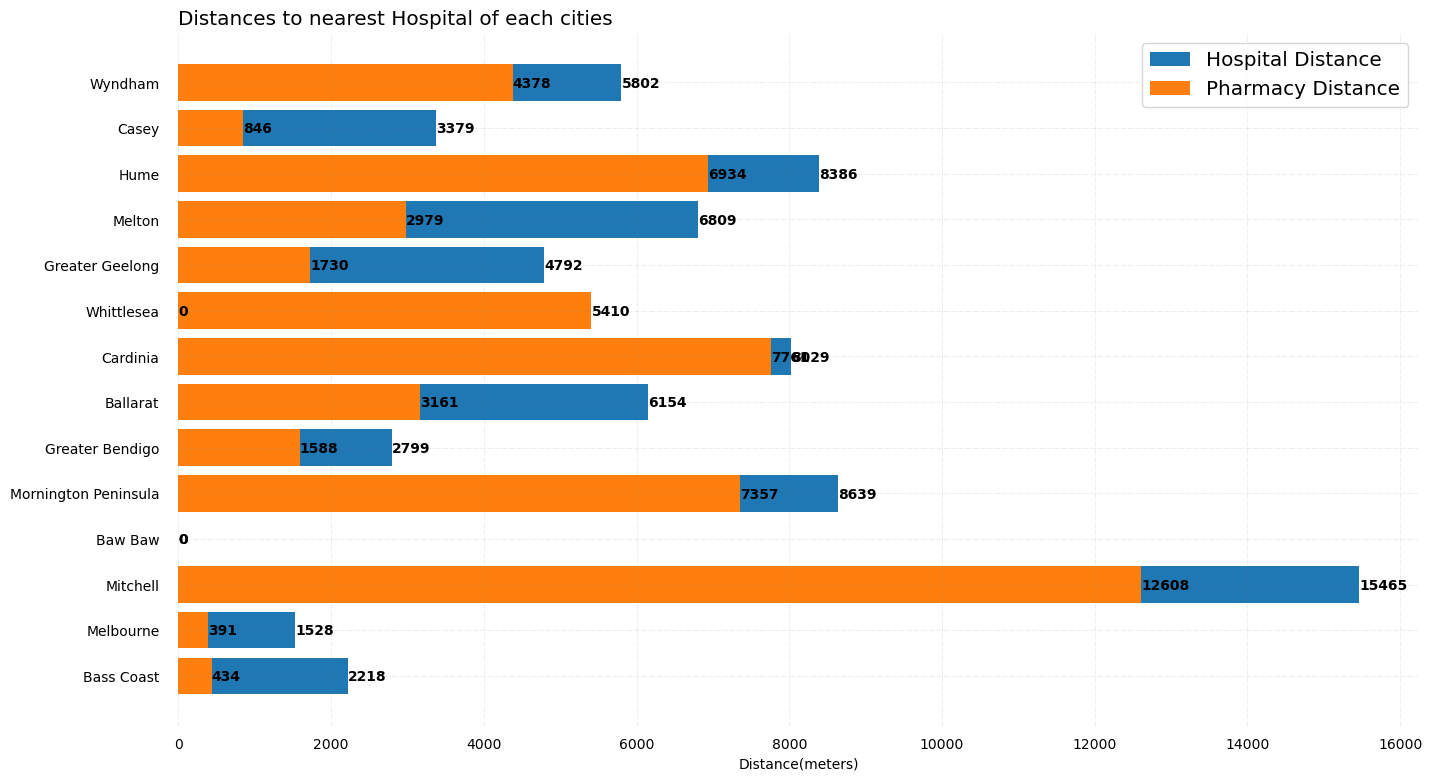

In [60]:
# #PLOT HBAR GRAPH FOR DISTANCES

# Figure Size
fig, ax = plt.subplots(figsize =(16, 9))
 
# Horizontal Bar Plot
ax.barh(lga_health_na_df ["Local Government Area"], lga_health_na_df["Hospital Distance"], label = "Hospital Distance")
ax.barh(lga_health_na_df ["Local Government Area"], lga_health_na_df["Pharmacy Distance"], label = "Pharmacy Distance")

 
# Remove axes splines
for s in ['top', 'bottom', 'left', 'right']:
    ax.spines[s].set_visible(False)
 
# Remove x, y Ticks
ax.xaxis.set_ticks_position('none')
ax.yaxis.set_ticks_position('none')
 
# Add padding between axes and labels
ax.xaxis.set_tick_params(pad = 5)
ax.yaxis.set_tick_params(pad = 10)
 
# Add x, y gridlines
ax.grid(visible = True, color ='grey',
        linestyle ='-.', linewidth = 0.5,
        alpha = 0.2)
 
# Show top values
ax.invert_yaxis()
 
# Add annotation to bars
for i in ax.patches:
    plt.text(i.get_width()+0.2, i.get_y()+0.5,
             str(round((i.get_width()), 2)),
             fontsize = 10, fontweight ='bold',
             color ='black')
 
# Add Plot Title
ax.set_title('Distances to nearest Hospital of each cities',
             loc ='left', fontsize="x-large")

ax.legend(loc='best', bbox_to_anchor=(1, 1), fontsize="x-large")

plt.xlabel("Distance(meters)")

# Show Plot
plt.show()


In [36]:
# #HBAR GRAPH (2ND OPTION)

# # Bar's width
# width = 0.4

# fig, ax = plt.subplots(figsize =(16, 9))
# x_axis = np.arange(len(lga_health_df["Local Government Area"]))

# # Horizontal Bar Plot
# ax.barh(x_axis, lga_health_df["Hospital Distance"], width, label = "Hospital Distance")
# ax.barh(x_axis + width, lga_health_df["Pharmacy Distance"], width, label = "Pharmacy Distance")

# # Set Y-axis ticks and ticklabels
# ax.set(yticks=x_axis, yticklabels=lga_health_df ["Local Government Area"], 
#        ylim=[2*width - 1, len(lga_health_df ["Local Government Area"])])

# # Remove axes splines
# for s in ['top', 'bottom', 'left', 'right']:
#     ax.spines[s].set_visible(False)
 
# # Remove x, y Ticks
# ax.xaxis.set_ticks_position('none')
# ax.yaxis.set_ticks_position('none')
 
# # Add padding between axes and labels
# ax.xaxis.set_tick_params(pad = 5)
# ax.yaxis.set_tick_params(pad = 10)
 
# # Add x, y gridlines
# ax.grid(visible = True, color ='grey',
#         linestyle ='-.', linewidth = 0.5,
#         alpha = 0.2)
 
# # Show top values
# ax.invert_yaxis()

# # Add annotation to bars
# for i in ax.patches:
#     plt.text(i.get_width()+0.2, i.get_y()+0.5,
#              str(round((i.get_width()), 2)),
#              fontsize = 10,
#              color ='black')
 
# # Add Plot Title
# ax.set_title('Distances to nearest Hospital of each cities',
#              loc ='left', fontsize="x-large")

# ax.legend(loc='best', bbox_to_anchor=(1, 1), fontsize="x-large")

# # Show Plot
# plt.show()

In [61]:
#Get rid of NAN rows for hvplot

lga_health_new_df = lga_health_df.dropna(how='any')
lga_health_new_df.head()

,Local Government Area,Longitude,Latitude,Hospital name,Hospital Distance,Hospital Latitude,Hospital Longitude,Pharmacy name,Pharmacy Distance,Pharmacy Latitude,Pharmacy Longitude
75,Wyndham,144.630237,-37.893689,Werribee Mercy Hospital,5802,-37.887128,144.697714,Chemist Warehouse,4378,-37.877084,144.675553
13,Casey,145.310842,-38.092627,Cranbourne Integrated Care Centre,3379,-38.113481,145.281069,Chemist Warehouse,846,-38.086505,145.316905
32,Hume,144.823708,-37.597152,Craigieburn Health Service,8386,-37.595697,144.919647,Direct Chemist Outlet Greenvale,6934,-37.639117,144.881884
44,Melton,144.635969,-37.681295,Melton Health,6809,-37.687464,144.558226,Chemist Warehouse,2979,-37.688967,144.603601
26,Greater Geelong,144.392813,-38.052098,Barwon Health North,4792,-38.085682,144.356768,Chemist Warehouse,1730,-38.065679,144.382886


In [62]:
%%capture --no-display

# Configure the map plot
map_plot_healthcare = lga_health_df.hvplot.points("Longitude","Latitude",
                    geo = True, 
                    tiles="OSM",
                    scale=0.12,
                    frame_width = 700,
                    frame_height=450,
                    hover_cols=["Local Government Area"],                        
                    color = "red") * lga_health_new_df.hvplot.points("Hospital Longitude","Hospital Latitude",
                            geo= True, 
                            hover_cols=["Hospital name", "Hospital Distance"], 
                            color ="blue") * lga_health_new_df.hvplot.points("Pharmacy Longitude","Pharmacy Latitude", 
                                    geo = True, 
                                    hover_cols=["Pharmacy name", "Pharmacy Distance"],
                                    color = "grey")
                                                                           
                       

# Display the map
map_plot_healthcare

:Overlay
   .Tiles.I    :Tiles   [x,y]
   .Points.I   :Points   [Longitude,Latitude]   (Local Government Area)
   .Points.II  :Points   [Hospital Longitude,Hospital Latitude]   (Hospital name,Hospital Distance)
   .Points.III :Points   [Pharmacy Longitude,Pharmacy Latitude]   (Pharmacy name,Pharmacy Distance)

In [92]:
lga_health_df


,Local Government Area,Longitude,Latitude,Hospital name,Hospital Distance,Hospital Latitude,Hospital Longitude,Pharmacy name,Pharmacy Distance,Pharmacy Latitude,Pharmacy Longitude
75,Wyndham,144.630237,-37.893689,Werribee Mercy Hospital,5802,-37.887128,144.697714,Chemist Warehouse,4378,-37.877084,144.675553
13,Casey,145.310842,-38.092627,Cranbourne Integrated Care Centre,3379,-38.113481,145.281069,Chemist Warehouse,846,-38.086505,145.316905
32,Hume,144.823708,-37.597152,Craigieburn Health Service,8386,-37.595697,144.919647,Direct Chemist Outlet Greenvale,6934,-37.639117,144.881884
44,Melton,144.635969,-37.681295,Melton Health,6809,-37.687464,144.558226,Chemist Warehouse,2979,-37.688967,144.603601
26,Greater Geelong,144.392813,-38.052098,Barwon Health North,4792,-38.085682,144.356768,Chemist Warehouse,1730,-38.065679,144.382886
73,Whittlesea,145.061881,-37.550731,No Hospital found,NaN,NaN,NaN,Chemist Warehouse,5410,-37.593884,145.090357
12,Cardinia,145.41667,-38.15,Koo Wee Rup Hospital,8029,-38.200676,145.484259,Tooradin Pharmacy,7761,-38.214319,145.381943
2,Ballarat,143.767486,-37.519648,Ballarat Day Procedural Centre,6154,-37.540908,143.832191,Pharmacy 4 Less,3161,-37.543868,143.786301
24,Greater Bendigo,144.290407,-36.722847,Bendigo Health,2799,-36.749115,144.281051,White Hills Pharmacy,1588,-36.729453,144.306173
52,Mornington Peninsula,145.090723,-38.312806,The Bays Hospital,8639,-38.303736,145.189625,Wise Dispensary,7357,-38.373157,145.125503


In [91]:
waiting_time = "raw/Hospital_Wait_times.csv"
time_till_departure = "raw/Time_until_departed.csv"

# wait_df = pd.read_csv(waiting_time, decimal=',')
# wait_df

In [99]:

wait_df = pd.read_csv(waiting_time, decimal=',')
wait_df

,Reporting unit type,Long,Lat,Reporting unit,2011–12,2012–13,2013–14,2014–15,2015–16,2016–17,2017–18,2018–19,2019–20,2020–21,2021–22
0,Local Hospital Network,-36.131791,146.879417,Albury Wodonga Health,0,0,0,0,0,0,0,144,150,153,160
1,Hospital,-37.898663,145.314166,Albury Wodonga Health [Wodonga Campus],91,101,118,105,113,109,111,125,134,142,146
2,Local Hospital Network,-37.756355,145.060236,Alfred Health (Vic),0,0,0,0,0,0,0,177,179,193,203
3,Hospital,-37.830814,147.607905,Angliss Hospital,178,186,176,168,178,169,174,180,182,190,213
4,Local Hospital Network,-37.559658,143.847041,Austin Health (Vic),0,0,0,0,0,0,0,194,205,227,279
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
65,Local Hospital Network,NaN,NaN,Western Health (Vic),0,0,0,0,0,0,0,211,215,230,238
66,Hospital,NaN,NaN,Western Hospital [Footscray],285,250,237,239,192,189,222,230,239,273,295
67,Hospital,NaN,NaN,Williamstown Hospital,75,79,80,89,87,96,101,122,114,122,143
68,Hospital,NaN,NaN,Wimmera Base Hospital [Horsham],112,121,138,133,136,141,149,159,152,149,164


In [89]:
departure_df = pd.read_csv(time_till_departure, decimal=',')
departure_df

,Reporting unit type,Reporting unit,2011–12,2012–13,2013–14,2014–15,2015–16,2016–17,2017–18,2018–19,2019–20,2020–21,2021–22
0,Hospital,Albury Wodonga Health [Wodonga Campus],339,384,409,401,389,378,384,409,430,512,505
1,Hospital,Angliss Hospital,393,411,410,354,393,314,337,352,375,438,537
2,Hospital,Austin Hospital [Heidelberg],532,505,476,461,419,431,423,417,448,549,759
3,Hospital,Bairnsdale Regional Health Service,311,334,331,348,361,347,337,317,342,383,484
4,Hospital,Ballarat Health Services [Base Hospital],399,420,429,438,468,471,457,516,502,586,820
...,...,...,...,...,...,...,...,...,...,...,...,...,...
65,Local Hospital Network,West Gippsland Healthcare Group,0,0,0,0,0,0,0,441,459,456,519
66,Local Hospital Network,Western District Health Service (Vic),0,0,0,0,0,0,0,296,306,352,347
67,Local Hospital Network,Western Health (Vic),0,0,0,0,0,0,0,622,570,657,778
68,Local Hospital Network,Wimmera Health Care Group,0,0,0,0,0,0,0,464,435,458,505


In [103]:
lga_health_df

,Local Government Area,Longitude,Latitude,Hospital name,Hospital Distance,Hospital Latitude,Hospital Longitude,Pharmacy name,Pharmacy Distance,Pharmacy Latitude,Pharmacy Longitude
75,Wyndham,144.630237,-37.893689,Werribee Mercy Hospital,5802,-37.887128,144.697714,Chemist Warehouse,4378,-37.877084,144.675553
13,Casey,145.310842,-38.092627,Cranbourne Integrated Care Centre,3379,-38.113481,145.281069,Chemist Warehouse,846,-38.086505,145.316905
32,Hume,144.823708,-37.597152,Craigieburn Health Service,8386,-37.595697,144.919647,Direct Chemist Outlet Greenvale,6934,-37.639117,144.881884
44,Melton,144.635969,-37.681295,Melton Health,6809,-37.687464,144.558226,Chemist Warehouse,2979,-37.688967,144.603601
26,Greater Geelong,144.392813,-38.052098,Barwon Health North,4792,-38.085682,144.356768,Chemist Warehouse,1730,-38.065679,144.382886
73,Whittlesea,145.061881,-37.550731,No Hospital found,NaN,NaN,NaN,Chemist Warehouse,5410,-37.593884,145.090357
12,Cardinia,145.41667,-38.15,Koo Wee Rup Hospital,8029,-38.200676,145.484259,Tooradin Pharmacy,7761,-38.214319,145.381943
2,Ballarat,143.767486,-37.519648,Ballarat Day Procedural Centre,6154,-37.540908,143.832191,Pharmacy 4 Less,3161,-37.543868,143.786301
24,Greater Bendigo,144.290407,-36.722847,Bendigo Health,2799,-36.749115,144.281051,White Hills Pharmacy,1588,-36.729453,144.306173
52,Mornington Peninsula,145.090723,-38.312806,The Bays Hospital,8639,-38.303736,145.189625,Wise Dispensary,7357,-38.373157,145.125503


In [119]:
new_waiting_time = "raw/new_wait.csv"
new_wait =pd.read_csv(new_waiting_time, decimal=',')

new_wait.head()


,Name,Sector,Primary Health Network area (PHN),Reporting unit,2011–12,2012–13,2013–14,2014–15,2015–16,2016–17,2017–18,2018–19,2019–20,2020–21,2021–22
0,Ballarat Day Procedural Centre,Public,Western Victoria,Ballarat Health Services,0,0,0,0,0,0,0,193,195,213,260
1,The McKellar Centre,Public,Western Victoria,Barwon Health,0,0,0,0,0,0,0,206,210,214,246
2,Bendigo Health,Public,Murray,Bendigo Health Care Group,0,0,0,0,0,0,0,189,201,210,232
3,The Peter James Centre [East Burwood],Public,Eastern Melbourne,Eastern Health (Vic),0,0,0,0,0,0,0,206,210,231,251
4,Werribee Mercy Hospital,Public,North Western Melbourne,Mercy Public Hospital Inc. (Vic),0,0,0,0,0,0,0,192,195,212,233


In [ ]:
vic_visits_path = "raw/new_wait.csv"
new_wait =pd.read_csv(new_waiting_time, decimal=',')

new_wait.head()


In [214]:
#lga_wait_time = pd.merge(lga_health_df,new_wait, how= "outer", on=["Hospital name","Name"])

In [215]:
vic = "raw/vic_visitations.csv"
new_wait =pd.read_csv(vic, decimal=',')

UnicodeDecodeError: 'utf-8' codec can't decode byte 0x96 in position 55: invalid start byte

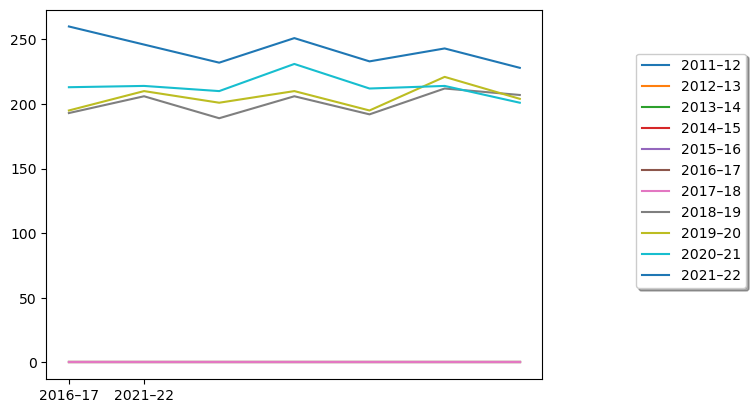

In [126]:
ax = new_wait.plot(kind="line")

x_axis = np.arange(2)
tick_locations = [values for values in x_axis]
#plt.xticks(tick_locations,["2016–17","2017–18","2018–19","2019–20","2020–21","2021–22"])
plt.xticks(tick_locations, ["2016–17","2021–22"])

ax.legend(loc='upper center', bbox_to_anchor=(1.3, 0.9),
          ncol=1, fancybox=True, shadow=True)
plt.show()

Text(0, 0.5, 'Avg. Wait Time (Min) Patients Spent at the Hospital')

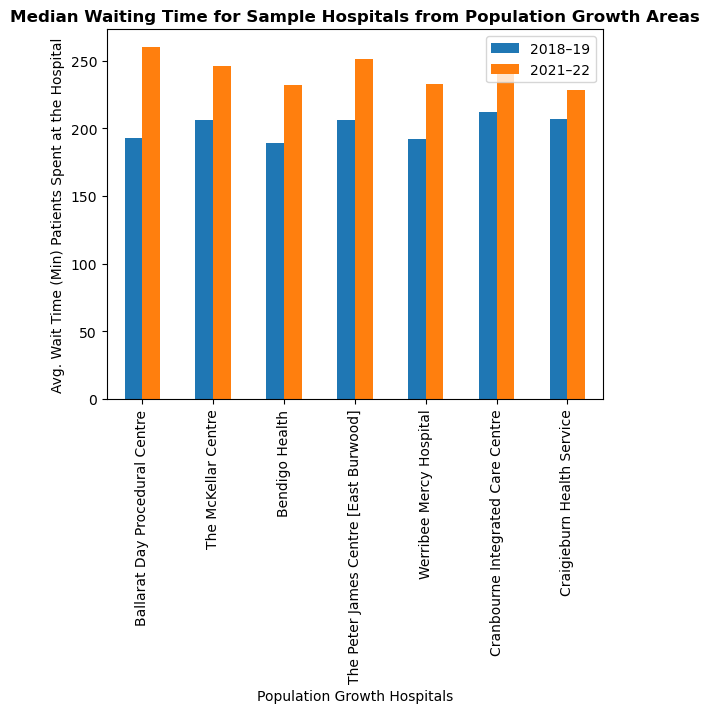

In [180]:
new_wait.plot(x="Name", y=["2018–19","2021–22"], kind="bar", stacked=False)
plt.title("Median Waiting Time for Sample Hospitals from Population Growth Areas", fontweight="bold")
plt.xlabel("Population Growth Hospitals")
plt.ylabel("Avg. Wait Time (Min) Patients Spent at the Hospital")

In [161]:
clearing_er_path= "raw/clearing_er.csv"
clearing_er =pd.read_csv(clearing_er_path, decimal=',')

clearing_er.head()


,Name,Sector,Primary Health Network area (PHN),Reporting unit,2018,2019,2020,2021
0,Ballarat Day Procedural Centre,Public,Western Victoria,Ballarat Health Services,516,502,586,820
1,The McKellar Centre,Public,Western Victoria,Barwon Health,470,486,489,578
2,Bendigo Health,Public,Murray,Bendigo Health Care Group,532,547,593,742
3,The Peter James Centre [East Burwood],Public,Eastern Melbourne,Eastern Health (Vic),458,479,555,719
4,Werribee Mercy Hospital,Public,North Western Melbourne,Mercy Public Hospital Inc. (Vic),423,446,524,575


TypeError: unsupported operand type(s) for -: 'str' and 'int'

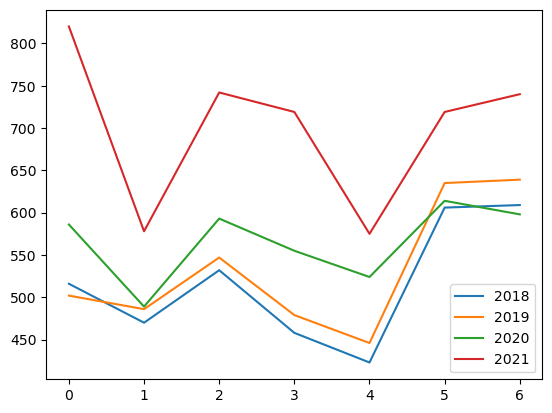

In [178]:
t3 = clearing_er.plot(kind="line")

x_axis = np.arange("Reporting Unit")
tick_locations = [values for values in x_axis]
plt.xticks(tick_locations, ["2018","2021"])

ax.legend(loc='upper center', bbox_to_anchor=(1.3, 0.9),
          ncol=1, fancybox=True, shadow=True)

In [167]:
clreaing_tra = clearing_er.T
clreaing_tra

,0,1,2,3,4,5,6
Name,Ballarat Day Procedural Centre,The McKellar Centre,Bendigo Health,The Peter James Centre [East Burwood],Werribee Mercy Hospital,Cranbourne Integrated Care Centre,Craigieburn Health Service
Sector,Public,Public,Public,Public,Public,Public,Public
Primary Health Network area (PHN),Western Victoria,Western Victoria,Murray,Eastern Melbourne,North Western Melbourne,South Eastern Melbourne,North Western Melbourne
Reporting unit,Ballarat Health Services,Barwon Health,Bendigo Health Care Group,Eastern Health (Vic),Mercy Public Hospital Inc. (Vic),Monash Health,Northern Health (Vic)
2018,516,470,532,458,423,606,609
2019,502,486,547,479,446,635,639
2020,586,489,593,555,524,614,598
2021,820,578,742,719,575,719,740


TypeError: unsupported operand type(s) for -: 'str' and 'int'

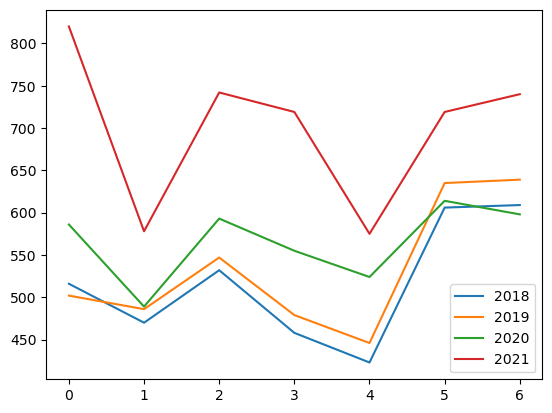

In [205]:
t3 = clearing_er.plot(kind="line")

x_axis = np.arange("Reporting Unit")
tick_locations = [values for values in x_axis]
plt.xticks(tick_locations, ["2018","2021"])

ax.legend(loc='upper center', bbox_to_anchor=(1.3, 0.9),
          ncol=1, fancybox=True, shadow=True)